In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def mostra_img(imagem):
  fig = plt.gcf()
  fig.set_size_inches(18, 6)
  plt.imshow(imagem, cmap='gray')
  plt.axis('off')
  plt.show()

#Segmentação baseada em região

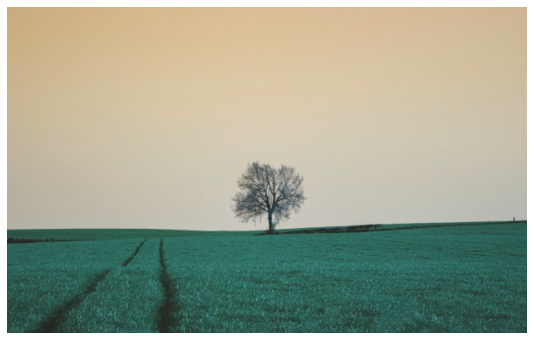

In [5]:
img = cv2.imread("/content/paisagem01.jpg")
mostra_img(img)

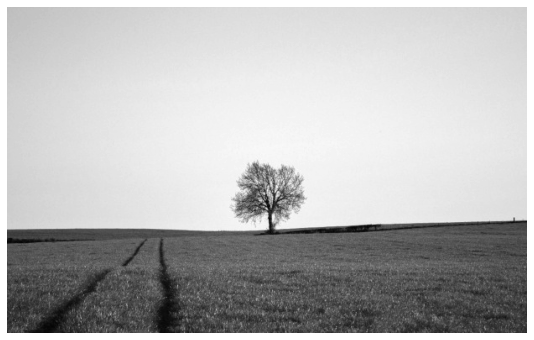

In [6]:
altura, largura = img.shape[0], img.shape[1]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
mostra_img(gray)

In [7]:
img_flat = gray.reshape(altura * largura)
print(img_flat), print(img_flat.shape)

[156 158 159 ...  66  60  62]
(241180,)


(None, None)

In [8]:
media = img_flat.mean()
print(media)

152.5262874201841


In [9]:
num_pixels = len(img_flat)
print(num_pixels)

241180


In [10]:
for i in range(num_pixels):
  if img_flat[i] > media:
    img_flat[i] == 255
  else:
    img_flat[i] = 0

In [11]:
img_flat

array([156, 158, 159, ...,   0,   0,   0], dtype=uint8)

In [12]:
seg_regiao = img_flat.reshape(altura, largura)
seg_regiao.shape

(389, 620)

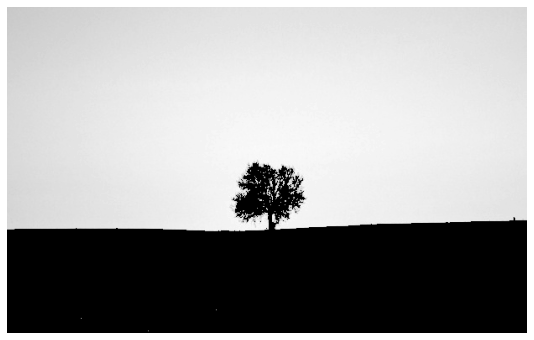

In [13]:
mostra_img(seg_regiao)

In [17]:
def flatten_img(img):
  altura, largura = img.shape[0], img.shape[1]
  img_flat = img.reshape(altura * largura)

  return img_flat

In [18]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_flat = flatten_img(gray)
print(img_flat)
print(img_flat.shape)
print("Média: " + str(img_flat.mean()))

[156 158 159 ...  66  60  62]
(241180,)
Média: 152.5262874201841


In [19]:
from skimage.color import rgb2gray

In [20]:
gray = rgb2gray(img)
img_flat = flatten_img(gray)
print(img_flat)
print(img_flat.shape)
print("Média: " + str(img_flat.mean()))

[0.6640902  0.67193333 0.6758549  ... 0.2539749  0.23211216 0.23995529]
(241180,)
Média: 0.6144771479539324


#2 regiões

In [41]:
def segmenta2regioes(img):
  pixels = flatten_img(img).copy()
  media = pixels.mean()
  for i in range(len(pixels)):
    if pixels[i] > media:
      pixels[i] = 255
    else:
      pixels[i] = 0

  seg_regiao = pixels.reshape(img.shape[0], img.shape[1])
  return seg_regiao

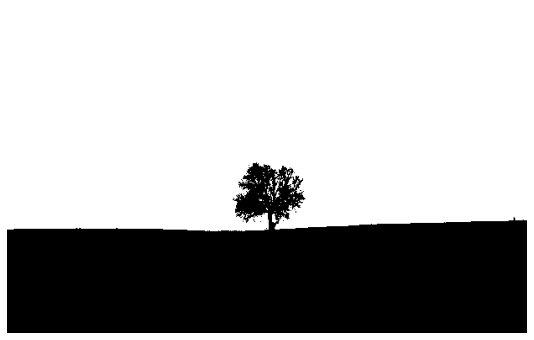

In [25]:
seg_regiao = segmenta2regioes(gray)
mostra_img(seg_regiao)

#3 Regiões

In [26]:
1/3

0.3333333333333333

In [42]:
def segmenta3regioes(img):
  pixels = flatten_img(img).copy()

  for i in range(len(pixels)):
    if pixels[i] > 0.66:
      pixels[i] = 2
    elif pixels[i] > 0.33:
      pixels[i] = 1
    else:
      pixels[i] = 0

  seg_regiao = pixels.reshape(img.shape[0], img.shape[1])
  return seg_regiao

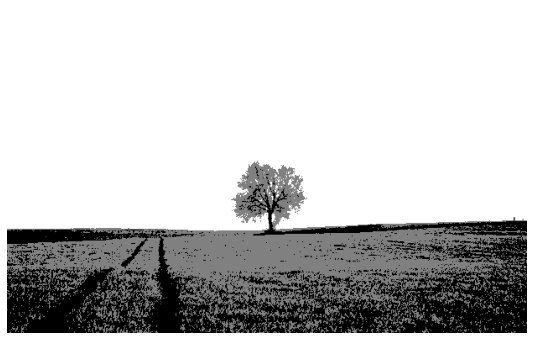

In [29]:
seg_regiao = segmenta3regioes(gray)
mostra_img(seg_regiao)

#4 regiões

In [43]:
def segmenta4regioes(img):
  pixels = flatten_img(img).copy()

  for i in range(len(pixels)):
    if pixels[i] > 0.75:
      pixels[i] = 3
    elif pixels[i] > 0.5:
      pixels[i] = 2
    elif pixels[i] > 0.25:
      pixels[i] = 1
    else:
      pixels[i] = 0

  seg_regiao = pixels.reshape(img.shape[0], img.shape[1])
  return seg_regiao

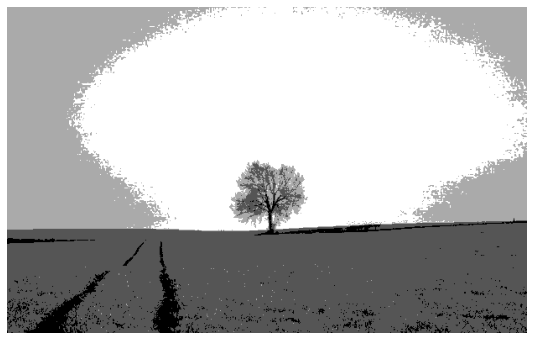

In [32]:
seg_regiao = segmenta4regioes(gray)
mostra_img(seg_regiao)

#5 Regiões

In [44]:
def segmenta5regioes(img):
  pixels = flatten_img(img).copy()

  for i in range(len(pixels)):
    if pixels[i] > 0.8:
      pixels[i] = 4
    elif pixels[i] > 0.6:
      pixels[i] = 3
    elif pixels[i] > 0.4:
      pixels[i] = 2
    elif pixels[i] > 0.2:
      pixels[i] = 1
    else:
      pixels[i] = 0

  seg_regiao = pixels.reshape(img.shape[0], img.shape[1])
  return seg_regiao

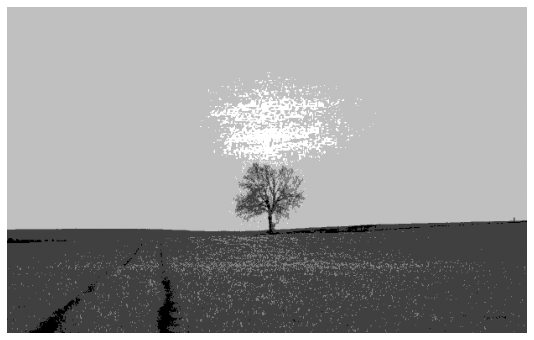

In [34]:
seg_regiao = segmenta5regioes(gray)
mostra_img(seg_regiao)

In [45]:
def segmentacao_regiao(img, cmap='gray'):
  original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  gray = rgb2gray(img)
  segment2R = segmenta2regioes(gray)
  segment3R = segmenta3regioes(gray)
  segment4R = segmenta4regioes(gray)
  segment5R = segmenta5regioes(gray)

  titulos = ['Imagem Original', '2 Regiões', '3 Regiões', 
             '4 Regiões', '5 Regiões', 'Original (1 canal']

  imagens = [original, segment2R, segment3R, segment4R, segment5R, gray]

  fig = plt.gcf()
  fig.set_size_inches(18, 10)

  for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(imagens[i], cmap)
    plt.title(titulos[i])
    plt.xticks([]),plt.yticks([])

  plt.subplots_adjust(wspace=0.05)
  plt.show()


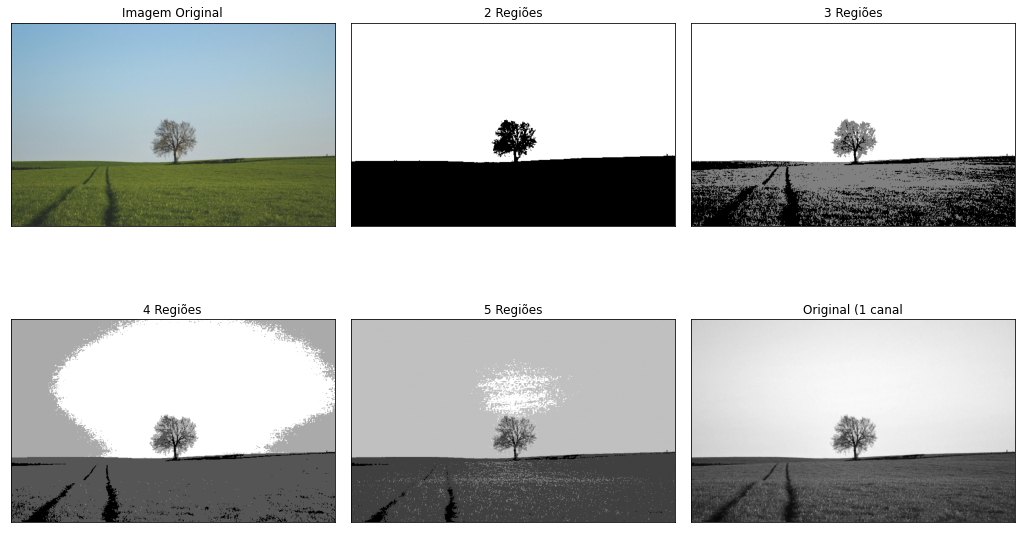

In [46]:
segmentacao_regiao(img)

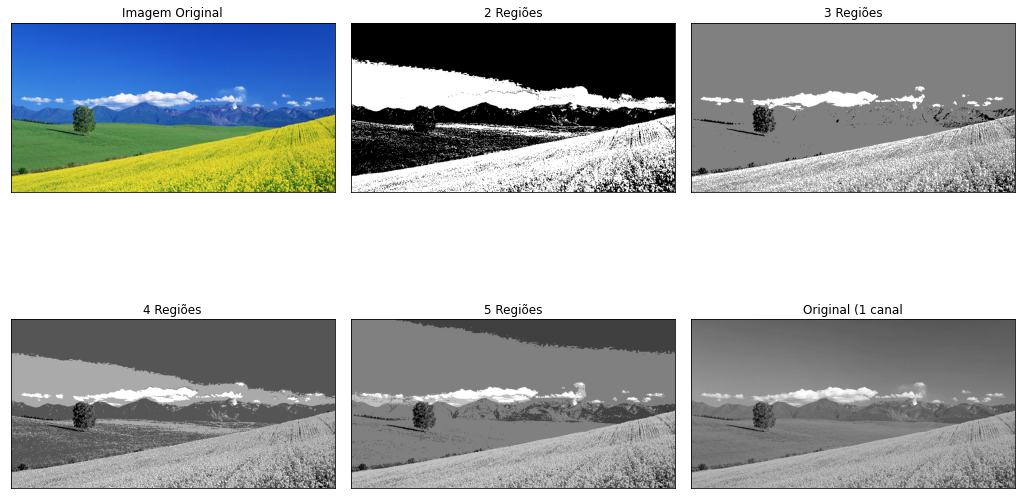

In [47]:
img = cv2.imread('/content/paisagem02.jpg')
segmentacao_regiao(img)

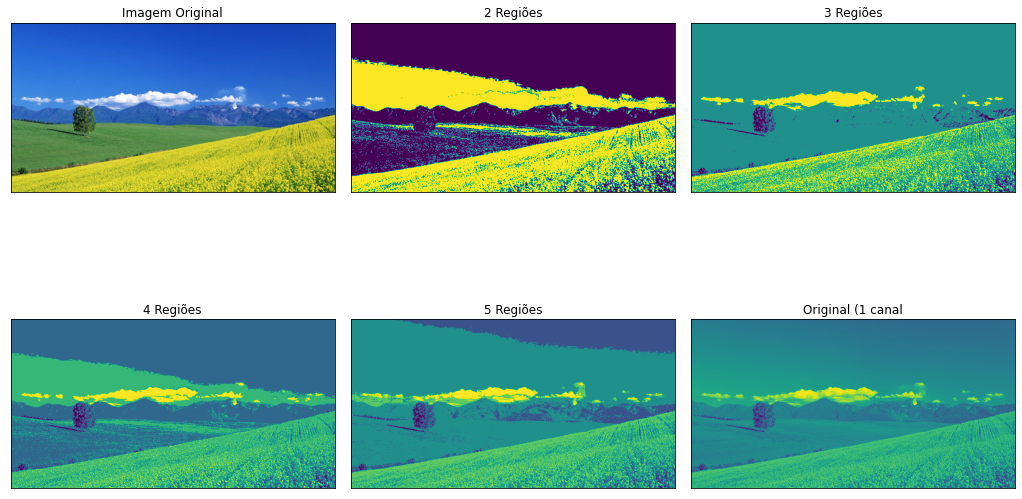

In [53]:
img = cv2.imread('/content/paisagem02.jpg')
segmentacao_regiao(img, cmap='viridis')

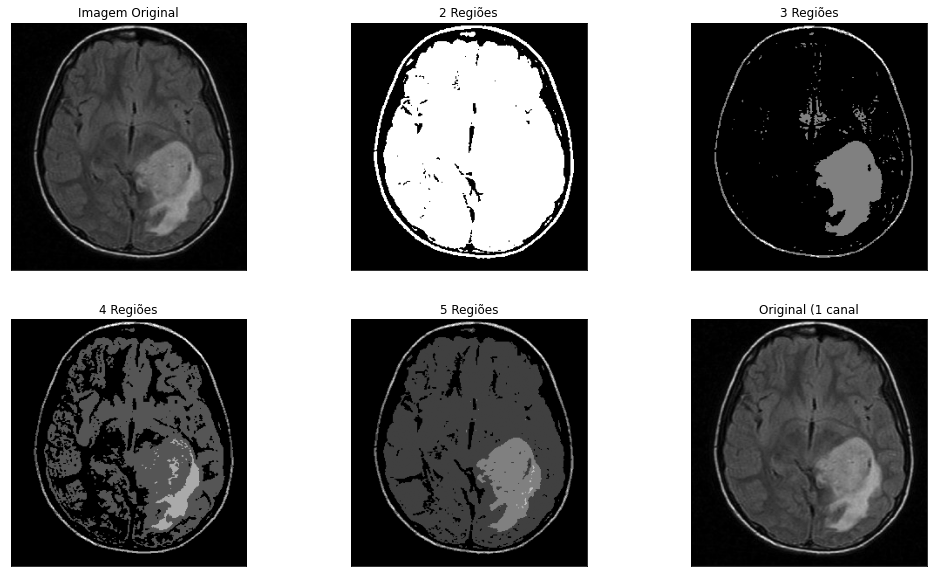

In [48]:
img = cv2.imread('/content/ct-scan.jpg')
segmentacao_regiao(img)

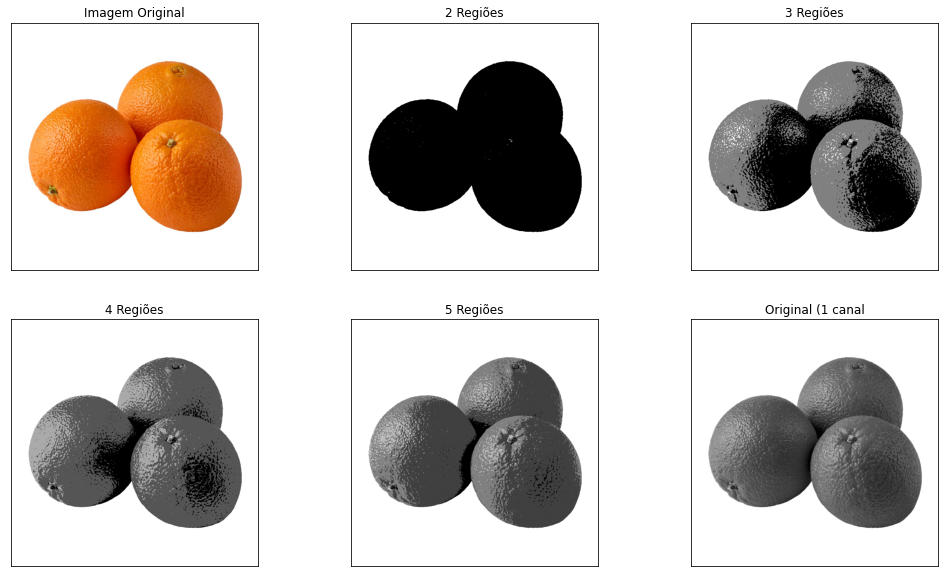

In [49]:
img = cv2.imread('/content/laranjas.jpg')
segmentacao_regiao(img)

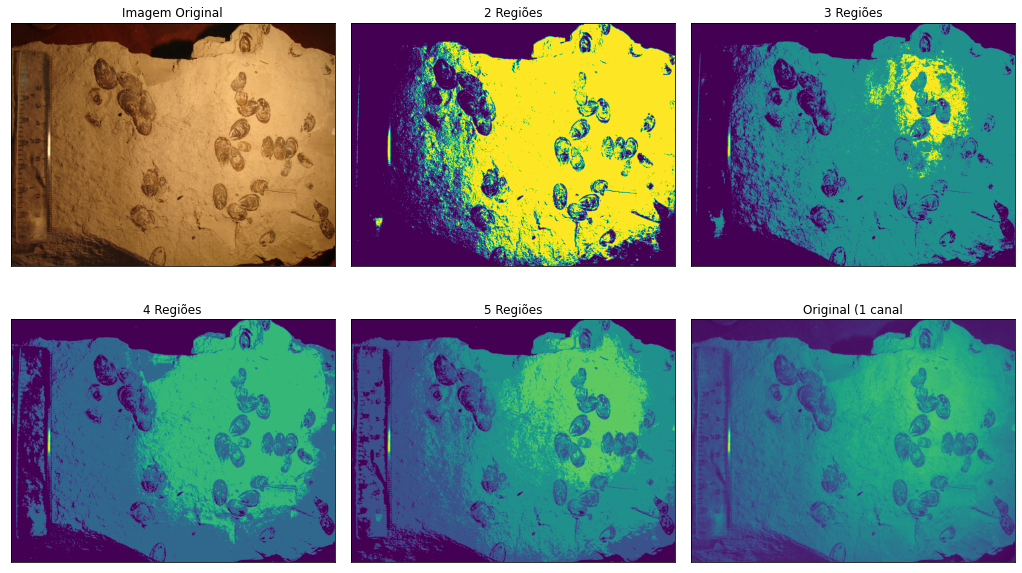

In [52]:
img = cv2.imread('/content/DSC01713.JPG')
segmentacao_regiao(img, cmap='viridis')